# Programming inside Google Colab: Integrating Colab with cloud storage and data repositories

In this notebook, we are going to see the basics of cloud computing in Colab through an example.

Colab provides a Python 3 environment tailored for data science and machine learning. It provides virtual machines where you get some CPU time, some disk space and memory, which you can all expand (for a price) as well as adding GPUs and TPUs for machine learning purposes. It is an interesting option because it's consistent for everyone (So, replicable) and accessible from everywhere.

It is probably not recommended for research, because the environment changes regularly, so in the time span of an economics paper the codes may not run correctly by the end of the project, but it is ideal for experimenting with data science tools without having to install your own environment.

## We are going to do a small research project that integrates Colab with the following services:
- Google Drive
- Github
- Huggingface
- Kaggle

## What are we going to do in this notebook?

- Mount Google Drive into Colab to access our files
- Make accounts for huggingface and kaggle, get user tokens, save them to drive and load them into Colab
- Download a dataset from kaggle and train a small image classification algorithm
- Save the data to our google drive
- Upload the model to our huggingface account

## First of all, Colab runs Python 3. So, whatever you have learned about Python applies here.

> Añadir blockquote



For instance, here we load one of the example datasets from the included sample_data folder, and indeed, Pandas works as we would expect:


In [1]:
import pandas as pd, geopandas as gp
california = pd.read_csv('sample_data/california_housing_train.csv')
california.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

Or, for instance, Geopandas is installed and runs just fine:

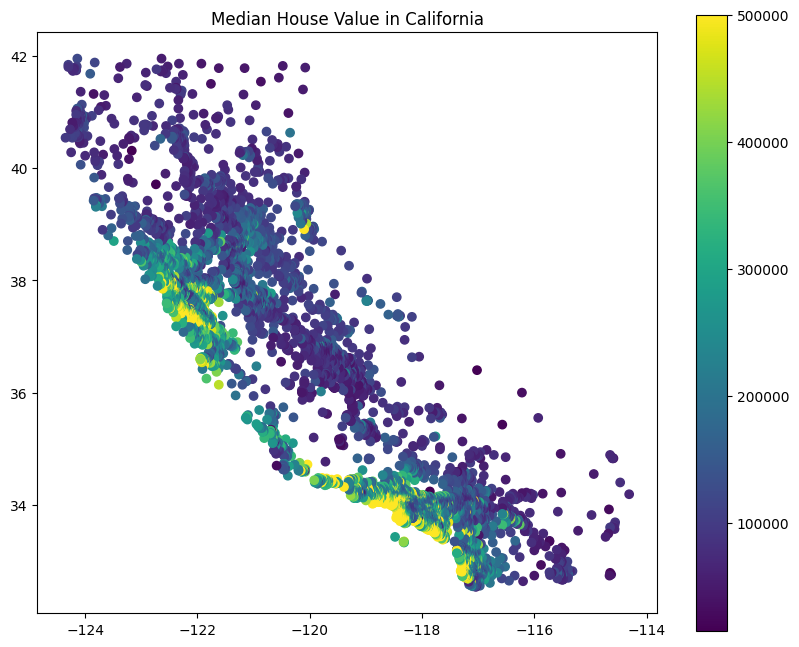

In [2]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create Point geometries from longitude and latitude
geometry = [Point(xy) for xy in zip(california.longitude, california.latitude)]

# Create a GeoDataFrame
geo_california = gp.GeoDataFrame(california, geometry=geometry)

# Plot the median house value
geo_california.plot(column='median_house_value', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Median House Value in California')
plt.show()


## Integration with Google Drive, kaggle, huggingface

Before moving any further, I need you to have an API key for kaggle and huggingface.

First, we mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then, your Google Drive is at the 'content/drive' directory, and you can access all your files.

## Now, we need a kaggle account and a huggingface account, as well as a location to save the data on Drive

Set the path:

(Here, place yours)

In [4]:
!pwd

/content


In [5]:
import os
basepath = '/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science'
%cd {basepath}

/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science


and make sure the tokens for kaggle and huggingface are present

In [6]:
import os

kaggle_key_location = 'tokens/kaggle.json'
huggingface_key_location = 'tokens/huggingface.txt'
github_key_location = 'tokens/github.txt'

if not os.path.isfile(kaggle_key_location):
    raise FileNotFoundError(f"The Kaggle API key file '{kaggle_key_location}' was not found.")
if not os.path.isfile(huggingface_key_location):
    raise FileNotFoundError(f"The Hugging Face API key file '{huggingface_key_location}' was not found.")

In [7]:
import json
with open(kaggle_key_location, 'r') as f:
    kaggle_key = json.loads(f.read())
with open(huggingface_key_location, 'r') as f:
    huggingface_key = f.read()

import os
os.environ['KAGGLE_USERNAME'] = kaggle_key['username']
os.environ['KAGGLE_KEY'] = kaggle_key['key']

In [8]:
os.environ['KAGGLE_USERNAME']

'theleache'

In [9]:
with open(github_key_location, 'r') as f:
    token = f.read()

!git config --global user.email "alvaro.sanchez@cemfi.edu.es"
!git config --global user.name "TheLeache"

## Getting things from Github

We can link GitHub repositories to Colab the same way we would on a local machine. First, we check that git is installed in the virtual machine:

In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


And then, we can clone the GitHub repository for these TA sessions, to the virtual drive of the Colab instance, or to your Google Drive.

You can clone your own private repositories too. You can create a personal access token following the instructions here:

https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens#creating-a-personal-access-token-classic

And now, I can clone one of my private GitHub repos, by adding my token to the URL:

In [11]:
user = "TheLeache"
repo = "data_science_cemfi_python"

#clone repo if it does not exist:
if not os.path.isdir(repo):

  # !git clone https://{token}@github.com/{user}/{repo}.git
  !git clone https://github.com/{user}/{repo}.git

I can modify this cloned folder, for instance by saving a plot to it:

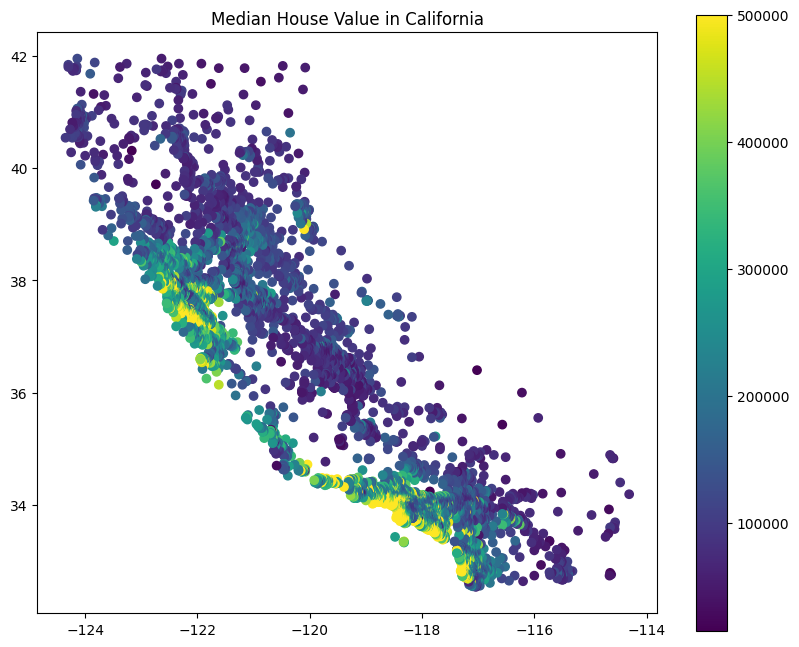

In [12]:
os.makedirs('data_science_cemfi_python/plots/', exist_ok = True)
# Plot the median house value
geo_california.plot(column='median_house_value', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Median House Value in California')
plt.savefig('data_science_cemfi_python/plots/california_housing.png')

Now, I can use git in the command line to push to the main branch:

```python
!git config --global user.email "alvaro.sanchez@cemfi.edu.es"
!git config --global user.name "TheLeache"

%cd /content/data_science_cemfi_python
!git checkout main
!git remote -v
!git add plots/
!git commit -m "update of california map"
!git push origin main

```

Or to make a new one and create a fork of the repository:

```python
!git switch testbranch
!git push origin testbranch
```

## Loading models and data from Kaggle and Huggingface

Two of the most popular platforms for sharing machine learning models are kaggle and huggingface. You can integrate them into Colab, to download and share models. People also share datasets for learning how to use these tools.

## We have already loaded the access tokens before, so it's all good to go

## Application: Predicting if a videogame is a shooter from its cover


VGChartz is a webpage that collects information on the videogame market.
the dataset asaniczka/video-game-sales-2024 on Kaggle is a scrape of the data in this website. Using the Kaggle API, we download this dataset:

In [ ]:
!pwd

/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science


In [13]:
os.makedirs('videogames', exist_ok=True)  # Create the folder

!kaggle datasets download -d asaniczka/video-game-sales-2024 -p "{basepath}/videogames"
!unzip -o "{basepath}/videogames/video-game-sales-2024.zip" -d "{basepath}/videogames"

Dataset URL: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024
License(s): ODC Attribution License (ODC-By)
video-game-sales-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science/videogames/video-game-sales-2024.zip
  inflating: /content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science/videogames/vgchartz-2024.csv  


And we can look at its contents. We can tell that there is information on the title, genre and publisher, date of release and sales figures. Also, there is a column with a URL for the art on the box of the game.

In [14]:
vg_df = pd.read_csv('videogames/vgchartz-2024.csv')
vg_df.head()

img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal_sales  other_sales release_date last_update  
0      6.37      0.99       9.85         3.12   2013-09-17         NaN  
1      6.06      0.60       9.71         3.02   2014-11-18  2018-01-03  
2      8.41      0.47       5.49         1.78   2002-10-28         NaN  
3      9.06      0.06       5.33         1.42   2013-09-17         NaN  
4      6.18      0.41       6.05         2.44   2015-11-06  2018-01-14

In [15]:
len(vg_df)

64016

In [16]:
from dateutil import parser

# Function to extract year from mixed date formats
def extract_year(date):
    try:
        parsed_date = parser.parse(date)  # Parse the date string
        return parsed_date.year          # Extract the year
    except Exception:
        return None                      # Return None if parsing fails

# Apply the function to the release_date column
vg_df['year'] = vg_df['release_date'].apply(extract_year)

In [ ]:
vg_df

img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto V    X360        Action   
4             Call of Duty: Black Ops 3     PS4       Shooter   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  critic_score  total_sales  \
0            Rockstar Games        Rockstar North           9.4        20.32   
1            Rockstar Games        Rockstar North           9.7        19.39   
2            Rockstar Games        Rockstar North           9.6        16.15   
3            Rockstar Games        Rockstar North           NaN        15.86   
4                Activision              Treyarch           8.1        15.09   
...                     ...                   ...           ...          ...   
64011           Aksys Games      Arc System Works           NaN          NaN   
64012  Nippon Ichi Software  Nippon Ichi Software           NaN          NaN   
64013  Nippon Ichi Software  Nippon Ichi Software           NaN          NaN   
64014          Idea Factory               Otomate           NaN          NaN   
64015               Unknown            G.rev Ltd.           NaN          NaN   

       na_sales  jp_sales  pal_sales  other_sales release_date last_update  \
0          6.37      0.99       9.85         3.12   2013-09-17         NaN   
1          6.06      0.60       9.71         3.02   2014-11-18  2018-01-03   
2          8.41      0.47       5.49         1.78   2002-10-28         NaN   
3          9.06      0.06       5.33         1.42   2013-09-17         NaN   
4          6.18      0.41       6.05         2.44   2015-11-06  2018-01-14   
...         ...       ...        ...          ...          ...         ...   
64011       NaN       NaN        NaN          NaN   2016-08-11  2019-01-28   
64012       NaN       NaN        NaN          NaN   2020-07-30  2020-05-09   
64013       NaN       NaN        NaN          NaN   2020-07-30  2020-05-09   
64014       NaN       NaN        NaN          NaN   2019-02-28  2019-02-24   
64015       NaN       NaN        NaN          NaN          NaN  2023-09-29   

         year  
0      2013.0  
1      2014.0  
2      2002.0  
3      2013.0  
4      2015.0  
...       ...  
64011  2016.0  
64012  2020.0  
64013  2020.0  
64014  2019.0  
64015     NaN  

[64016 rows x 15 columns]

There are many genres in the data:

In [17]:
vg_df.genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [ ]:
len(vg_df.genre.unique())

20

## Display the cover of the best selling game released since 2007 in five genres:

Action, Shooter, Sports, Racing, Platform

We should not judge a book by its cover, but they tell us a lot of what we can expect from the videogame. Can we make the computer predict something about the game, given the cover?

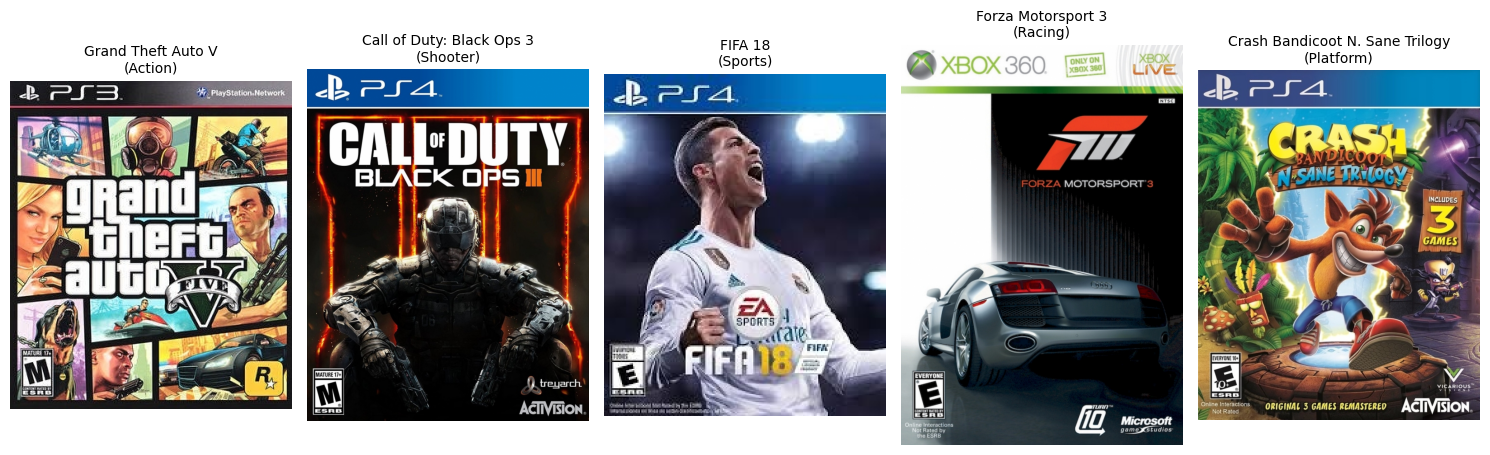

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def get_url(df, index):
  return "http://vgchartz.com" + df['img'].iloc[index]
#download the image at its original size
def get_image_noresize(df, i):
  image_url = get_url(df, i)
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content)).convert('RGB')
  return img
#resize the image to 128*128 pixels for the CNN model
def get_image(df, i):
  img = get_image_noresize(df, i).resize([128, 128])
  return img

# Group by genre, get the game with the highest total_sales for each genre of interest
genres_of_interest = ['Action', 'Shooter', 'Sports', 'Platform', 'Racing']
top_games = vg_df[(vg_df['genre'].isin(genres_of_interest)) & (vg_df['year'] >= 2007)].sort_values('total_sales', ascending=False).drop_duplicates(subset=['genre']).reset_index()

# Create subplots for the selected top games
fig, axes = plt.subplots(1, len(top_games), figsize=(15, 5))

# Loop through each game and plot its box art
for ax, (i, row) in zip(axes, top_games.iterrows()):
    img = get_image_noresize(top_games, i)  # Resize to fit
    ax.imshow(img)
    ax.axis('off')  # Hide the axes
    ax.set_title(f"{row['title']}\n({row['genre']})", fontsize=10)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## Our goal: We are going to predict if a game belongs to the genre "Shooter" from its cover.

For this purpose, we are going to select a sample of games to train a small Convolutional Neural Network (Made by Chris for his class)

## Create training and validation sets

We want to train a model which learns to classify the genre of a videogame by its box art. For this purpose, we take the highest selling 150 games on the PlayStation3, and we select 50 games randomly to be on the validation set:

In [19]:
# prompt: using the vg_df dataframe, I want you to make a new dataframe for only the videogames with highest value of total_sales on the platform PS3. I then want you to set a seed, and create a training set with 100 videogames, and a validation set with the rest, on two different dataframes

# Create a new DataFrame for PS3 games with the highest total sales
ps3_df = vg_df[vg_df['console'] == 'PS3'].sort_values(by='total_sales', ascending=False).head(150)

# Set a seed for reproducibility
import numpy as np
np.random.seed(1234)

# Shuffle the DataFrame
ps3_df = ps3_df.sample(frac=1).reset_index(drop=True)

# Create training and validation sets
train_size = 100  # Number of games for the training set
df_train = ps3_df[:train_size]
df_validation = ps3_df[train_size:]

print("Training set shape:", df_train.shape)
print("Validation set shape:", df_validation.shape)

Training set shape: (100, 15)
Validation set shape: (50, 15)


In [20]:
df_validation.head()

img  \
100  /games/boxart/full_9621972AmericaFrontccc.jpg   
101  /games/boxart/full_6736771AmericaFrontccc.jpg   
102   /games/boxart/full_270231AmericaFrontccc.jpg   
103  /games/boxart/full_3173221AmericaFrontccc.jpg   
104  /games/boxart/full_7094507AmericaFrontccc.jpg   

                               title console             genre  \
100                       Dead Space     PS3           Shooter   
101                    Madden NFL 09     PS3            Sports   
102  Assassin's Creed IV: Black Flag     PS3  Action-Adventure   
103              Dragon Age: Origins     PS3      Role-Playing   
104              UFC 2009 Undisputed     PS3          Fighting   

           publisher          developer  critic_score  total_sales  na_sales  \
100  Electronic Arts  EA Redwood Shores           8.9         2.00      1.05   
101        EA Sports         EA Tiburon           8.6         1.89      1.56   
102          Ubisoft   Ubisoft Montreal           8.7         3.94      1.34   
103  Electronic Arts   BioWare Edmonton           8.7         1.67      0.96   
104              THQ       Yuke's Osaka           8.4         1.76      1.07   

     jp_sales  pal_sales  other_sales release_date last_update    year  
100       NaN       0.66         0.29   2008-10-13         NaN  2008.0  
101      0.00       0.15         0.18   2008-08-12         NaN  2008.0  
102      0.13       1.86         0.62   2013-10-29  2018-03-14  2013.0  
103      0.08       0.42         0.21   2009-11-03         NaN  2009.0  
104      0.01       0.45         0.24   2009-05-19         NaN  2009.0

## Create lists of X and Ys for training and validation:

In [22]:
#predicted variable: is it a shooter or not?
y_train, y_test = np.array(df_train['genre'] == 'Shooter'), np.array(df_validation['genre'] == 'Shooter')
#names of game
names_train, names_test = np.array(df_train['title']), np.array(df_validation['title'])
#actual genre of game
genres_train, genres_test = np.array(df_train['genre']), np.array(df_validation['genre'])

In [21]:
from tqdm import tqdm

#x variable: cover of the game, in 128x128x3 format, which is the format that the CNN takes in
X_train, X_test = [], []
for i in tqdm(range(len(df_train)), desc = 'downloading training covers'):
  image = get_image(df_train, i)
  if image.size == (128, 128):
    X_train.append(np.array(image))
for i in tqdm(range(len(df_validation)), desc = 'downloading validation covers'):
  image = get_image(df_validation, i)
  if image.size == (128, 128):
    X_test.append(np.array(image))

X_train = np.array(X_train); X_test = np.array(X_test)

downloading validation covers: 100%|██████████| 50/50 [00:20<00:00,  2.45it/s]


array([[[ 18,  16,  17],
        [ 20,  18,  19],
        [ 19,  17,  18],
        ...,
        [126, 125, 130],
        [126, 125, 130],
        [126, 125, 130]],

       [[ 19,  17,  18],
        [ 19,  17,  18],
        [ 20,  18,  19],
        ...,
        [127, 126, 131],
        [126, 125, 130],
        [128, 127, 132]],

       [[ 20,  18,  19],
        [ 19,  17,  18],
        [ 20,  18,  19],
        ...,
        [127, 126, 131],
        [126, 125, 130],
        [126, 125, 130]],

       ...,

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]]], dtype=uint8)
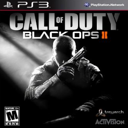

In [25]:
X_train[50]

array([[[ 33,  33,  33],
        [ 99,  99,  99],
        [ 57,  57,  57],
        ...,
        [131, 131, 133],
        [131, 131, 133],
        [132, 132, 134]],

       [[ 32,  32,  32],
        [ 99,  99,  99],
        [ 58,  58,  58],
        ...,
        [131, 131, 133],
        [131, 131, 133],
        [133, 133, 135]],

       [[ 32,  32,  32],
        [ 99,  99,  99],
        [ 58,  58,  58],
        ...,
        [130, 130, 132],
        [131, 131, 133],
        [132, 132, 134]],

       ...,

       [[165, 161, 158],
        [184, 180, 177],
        [169, 165, 162],
        ...,
        [ 49,  58,  50],
        [204, 205, 200],
        [225, 222, 219]],

       [[165, 161, 159],
        [184, 180, 177],
        [166, 162, 160],
        ...,
        [159, 160, 156],
        [217, 214, 211],
        [220, 216, 214]],

       [[202, 201, 199],
        [196, 194, 192],
        [169, 165, 163],
        ...,
        [235, 234, 232],
        [227, 226, 224],
        [225, 224, 222]]], dtype=uint8)
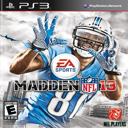

In [26]:
X_train[25]

## Train the model on our training and validation sets:

We define a CNN that takes 128*128*3 arrays, and returns a float value. We will train this on the data we collected. (This is why I resized the images)

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with 30 epochs
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6010 - loss: 18.4296 - val_accuracy: 0.2200 - val_loss: 13.1962
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 842ms/step - accuracy: 0.4333 - loss: 18.3985 - val_accuracy: 0.8000 - val_loss: 12.2215
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7121 - loss: 16.6892 - val_accuracy: 0.5200 - val_loss: 2.6808
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 904ms/step - accuracy: 0.5900 - loss: 9.5600 - val_accuracy: 0.8000 - val_loss: 4.9794
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 781ms/step - accuracy: 0.7820 - loss: 5.9677 - val_accuracy: 0.7800 - val_loss: 3.0435
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7047 - loss: 4.9740 - val_accuracy: 0.6400 - val_loss: 1.5226
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6069 - loss: 5.8619 - val_accuracy: 0.7600 - val_loss: 1.6718
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.7100 - loss: 2.4935 - val_accuracy: 0.7600 - val_loss: 0.8331

In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

## Plot a set of covers, with the genre and the corresponding prediction that it is a shooter. How did we do?

In [31]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


array([[[ 29,  27,  27],
        [ 29,  28,  27],
        [ 29,  28,  28],
        ...,
        [113, 113, 115],
        [114, 114, 116],
        [115, 115, 117]],

       [[ 29,  27,  28],
        [ 30,  28,  29],
        [ 30,  28,  29],
        ...,
        [114, 114, 116],
        [114, 114, 116],
        [115, 115, 117]],

       [[ 29,  27,  28],
        [ 30,  28,  29],
        [ 30,  28,  29],
        ...,
        [114, 114, 116],
        [114, 114, 116],
        [115, 115, 117]],

       ...,

       [[ 40,  35,  35],
        [ 37,  33,  35],
        [ 30,  28,  32],
        ...,
        [ 49,  46,  49],
        [ 51,  48,  48],
        [ 57,  55,  54]],

       [[ 29,  25,  27],
        [ 30,  26,  28],
        [ 29,  25,  28],
        ...,
        [ 41,  38,  39],
        [ 53,  48,  46],
        [ 58,  52,  49]],

       [[ 21,  20,  22],
        [ 18,  14,  18],
        [ 26,  23,  25],
        ...,
        [ 44,  40,  39],
        [ 58,  52,  49],
        [ 61,  54,  49]]], dtype=uint8)
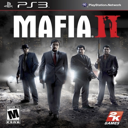

In [36]:
X_test[40]

In [37]:
predictions[40]

array([0.15604615], dtype=float32)

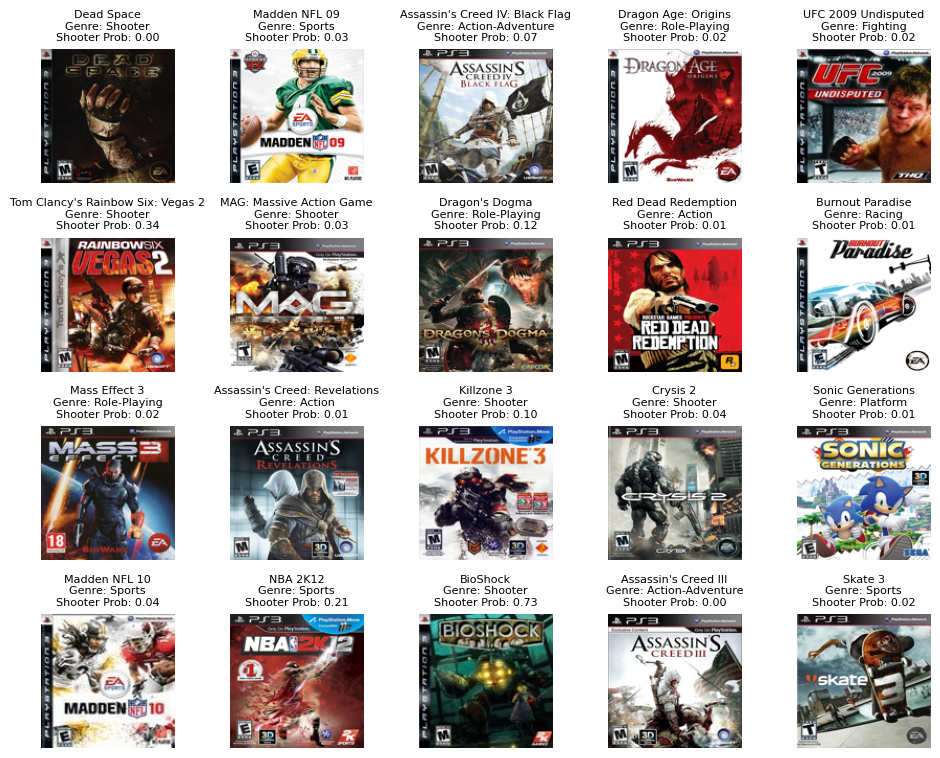

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the grid dimensions
cols = 5  # Maximum number of columns
num_images = 20
rows = (num_images + cols - 1) // cols  # Calculate required rows

# Calculate the figure size to match image size (128x128 pixels per image)
fig_width = cols * 128 / 100 *1.5 # 128 pixels per image, scaled by 100 to fit inches
fig_height = rows * 128 / 100 *1.5# Height for rows

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

# Loop through the images and display them
for idx, ax in enumerate(axes.flat):
    if idx < num_images:  # Only display available images
        image = X_test[idx]
        prediction = predictions[idx][0]  # Assuming predictions is a NumPy array
        genre = genres_test[idx]
        title = names_test[idx]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis ticks and labels

        ax.set_title(f"{title}\nGenre: {genre}\nShooter Prob: {prediction:.2f}", fontsize=8)
    else:
        # Hide extra axes if fewer images than grid spaces
        ax.axis('off')

# Set the aspect ratio to 1:1 for all axes (this ensures no distortion of images)
for ax in axes.flat:
    ax.set_aspect('equal')

# Adjust layout to make sure the grid fits without overlapping
plt.tight_layout()
plt.savefig('videogames/ps3_performance_examples.png')
plt.show()


## Evaluate model performance on PS4 games

Let's do the same: Download a few covers, and create predictions, out of sample, for games released some years later on the next release of the PlayStation.

In [39]:
# Create a new DataFrame for PS4 games with the highest total sales
ps4_df = vg_df[vg_df['console'] == 'PS4'].sort_values(by='total_sales', ascending=False).head(75)
# Shuffle the PS4 DataFrame
ps4_df = ps4_df.sample(frac=0.25).reset_index(drop=True)
# Predicted variable: is it a shooter or not?
y_train, y_test = np.array(df_train['genre'] == 'Shooter'), np.array(df_validation['genre'] == 'Shooter')
# Now, separate test set using PS4 games
y_test_ps4 = np.array(ps4_df['genre'] == 'Shooter')
names_test_ps4 = np.array(ps4_df['title'])
genres_test_ps4 = np.array(ps4_df['genre'])

X_test_ps4 = []
for i in tqdm(range(len(ps4_df)), desc='Downloading PS4 test covers'):
    image = get_image(ps4_df, i)
    if image.size == (128, 128):
        X_test_ps4.append(np.array(image))

X_test_ps4 = np.array(X_test_ps4)

# Now we test on the PS4 test set (out-of-sample data)
predictions_ps4 = model.predict(X_test_ps4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


## And we plot them again:

How did we do?

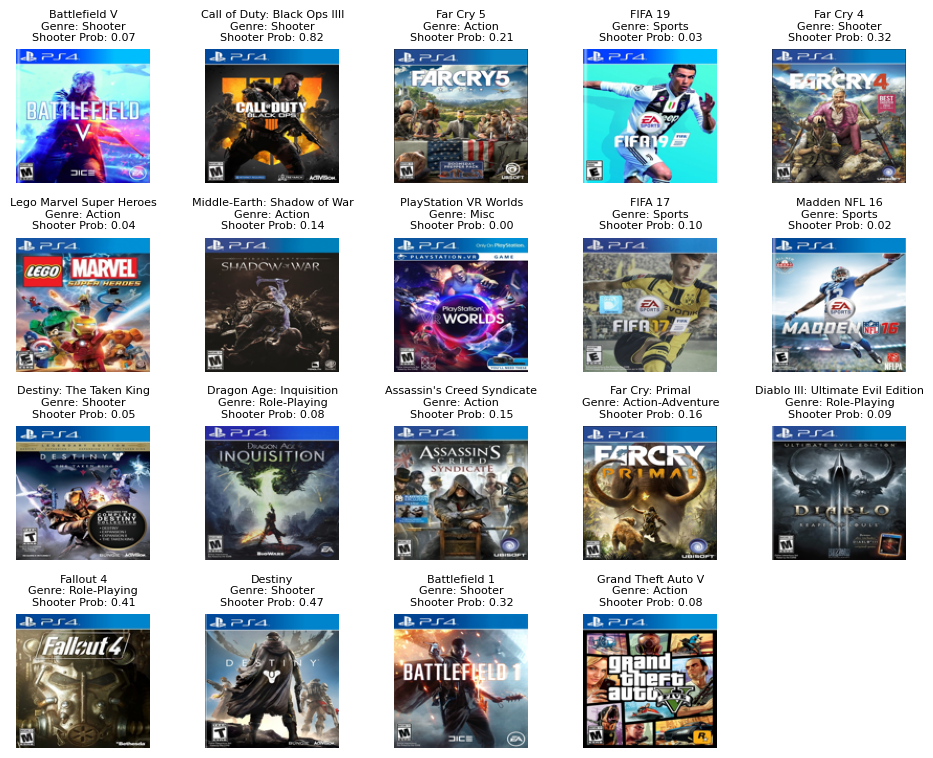

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the grid dimensions
cols = 5  # Maximum number of columns
num_images = len(X_test_ps4)
rows = (num_images + cols - 1) // cols  # Calculate required rows

# Calculate the figure size to match image size (128x128 pixels per image)
fig_width = cols * 128 / 100 * 1.5  # 128 pixels per image, scaled by 100 to fit inches
fig_height = rows * 128 / 100 * 1.5  # Height for rows

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

# Loop through the images and display them
for idx, ax in enumerate(axes.flat):
    if idx < num_images:  # Only display available images
        image = X_test_ps4[idx]
        prediction = predictions_ps4[idx][0]  # Assuming predictions_ps4 is a NumPy array
        genre = genres_test_ps4[idx]
        title = names_test_ps4[idx]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis ticks and labels

        ax.set_title(f"{title}\nGenre: {genre}\nShooter Prob: {prediction:.2f}", fontsize=8)
    else:
        # Hide extra axes if fewer images than grid spaces
        ax.axis('off')

# Set the aspect ratio to 1:1 for all axes (this ensures no distortion of images)
for ax in axes.flat:
    ax.set_aspect('equal')

# Adjust layout to make sure the grid fits without overlapping
plt.tight_layout()
plt.savefig('videogames/ps4_performance_examples.png')
plt.show()


## And finally, we save the model to huggingface:

We are so proud of our model, we want to save it to huggingface for everyone to use. We can export the model to a .keras file, which can be later loaded into Tensorflow by other people, for their inference purposes.

We then use the huggingface API with our login, to create a repository and upload the model.

In [41]:
import shutil

shutil.rmtree('videogames_model_repo', ignore_errors=True)

In [42]:
from huggingface_hub import login, create_repo, Repository
from huggingface_hub import HfApi

# Authenticate to Hugging Face Hub
login(token=huggingface_key)

# Create a new Hugging Face repository (set exist_ok=True to avoid errors if the repo already exists)
repo_url = create_repo(
    repo_id="videogames",
    token=huggingface_key,
    private=False,
    exist_ok=True
)

print(f"Repository created at: {repo_url}")

# Save the Keras model inside the cloned repository directory
model.save("videogames/videogames_model.keras")

api = HfApi()
api.upload_folder(
    folder_path="videogames",
    repo_id="TheLeache/videogames",
    repo_type="model",
)

Repository created at: https://huggingface.co/TheLeache/videogames


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


videogames_model.keras:   0%|          | 0.00/39.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/TheLeache/videogames/commit/ff13ca85ec08d81ed9f9df86d63f1abd55c3a0e6', commit_message='Upload folder using huggingface_hub', commit_description='', oid='ff13ca85ec08d81ed9f9df86d63f1abd55c3a0e6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/TheLeache/videogames', endpoint='https://huggingface.co', repo_type='model', repo_id='TheLeache/videogames'), pr_revision=None, pr_num=None)

## Now, try to load a classmate's model?


In [44]:
from huggingface_hub import login, HfApi, snapshot_download
from tensorflow.keras.models import load_model

# Authenticate to Hugging Face Hub
login(token=huggingface_key)

# Define the repo details
repo_id = "TheLeache/videogames"

# Clone the repository locally if needed (optional)
api = HfApi()
snapshot_download(repo_id=repo_id, repo_type="model", local_dir="videogames_test")

# Load the model saved in the repository
model_path = "videogames_test/videogames_model.keras"
classmate_model = load_model(model_path)

# Verify if the model is loaded
classmate_model.summary()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

ps3_performance_examples.png:   0%|          | 0.00/863k [00:00<?, ?B/s]

ps4_performance_examples.png:   0%|          | 0.00/778k [00:00<?, ?B/s]

videogames_model.keras:   0%|          | 0.00/39.7M [00:00<?, ?B/s]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

## And we use our classmate's model to predict on our data:

In [45]:
predictions_ps4_classmatemodel = classmate_model.predict(X_test_ps4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


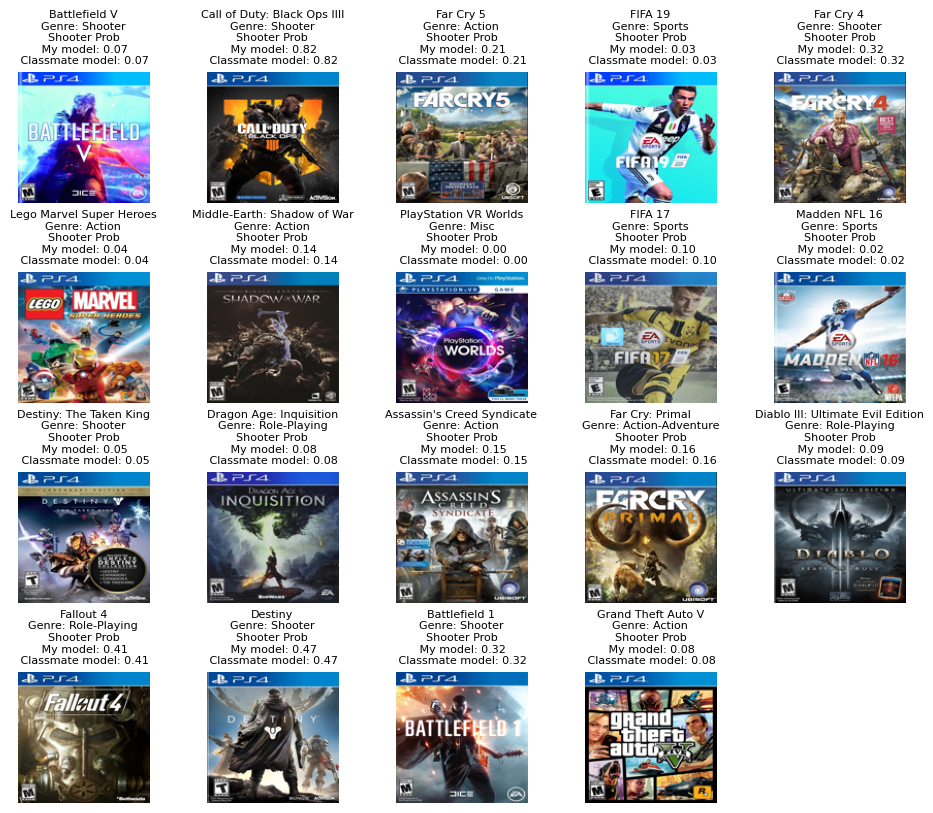

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the grid dimensions
cols = 5  # Maximum number of columns
num_images = len(X_test_ps4)
rows = (num_images + cols - 1) // cols  # Calculate required rows

# Calculate the figure size to match image size (128x128 pixels per image)
fig_width = cols * 128 / 100 * 1.5  # 128 pixels per image, scaled by 100 to fit inches
fig_height = rows * 128 / 100 * 1.6  # Height for rows

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

# Loop through the images and display them
for idx, ax in enumerate(axes.flat):
    if idx < num_images:  # Only display available images
        image = X_test_ps4[idx]
        prediction = predictions_ps4[idx][0]  # Assuming predictions_ps4 is a NumPy array
        prediction_classmate = predictions_ps4_classmatemodel[idx][0]
        genre = genres_test_ps4[idx]
        title = names_test_ps4[idx]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis ticks and labels

        ax.set_title(f"{title}\nGenre: {genre}\nShooter Prob\n My model: {prediction:.2f}\n Classmate model: {prediction_classmate:.2f}", fontsize=8)
    else:
        # Hide extra axes if fewer images than grid spaces
        ax.axis('off')

# Set the aspect ratio to 1:1 for all axes (this ensures no distortion of images)
for ax in axes.flat:
    ax.set_aspect('equal')

# Adjust layout to make sure the grid fits without overlapping
plt.tight_layout()
plt.savefig('videogames/ps4_performance_examples.png')
plt.show()


In [47]:
drive.flush_and_unmount()